In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from numpy import linalg as LA
from collections import defaultdict

In [2]:
Knetwork = nx.krackhardt_kite_graph()

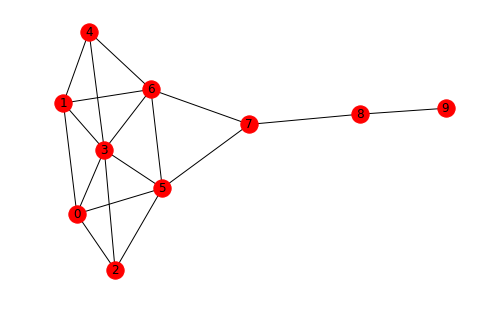

In [4]:
nx.draw(Knetwork, with_labels = True)

In [5]:
#Adjacency matrix for the krackhardt_kite network
Adjacency_matrix = [ [0] * Knetwork.number_of_nodes() for i in range(Knetwork.number_of_nodes())]
for row, column in list(Knetwork.edges):
    Adjacency_matrix[row][column] = 1              #edge exists between i and j so insert 1
    Adjacency_matrix[column][row] = 1              #value of A[j][i] equals A[i][j] since krackhardt_kite is an undirected graph

In [6]:
print("Adjacency Matrix for the krackhardt_kite network:- ")
Adjacency_matrix

Adjacency Matrix for the krackhardt_kite network:- 


[[0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
 [1, 0, 0, 1, 1, 0, 1, 0, 0, 0],
 [1, 0, 0, 1, 0, 1, 0, 0, 0, 0],
 [1, 1, 1, 0, 1, 1, 1, 0, 0, 0],
 [0, 1, 0, 1, 0, 0, 1, 0, 0, 0],
 [1, 0, 1, 1, 0, 0, 1, 1, 0, 0],
 [0, 1, 0, 1, 1, 1, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 1, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]]

<h3><u>Normalized Degree Centrality</u> :-</h3>
    <br>First we define "degree centrality" measure and then the "normalized degree centrality" measure
    <br><br><b>Degree Centrality</b> - Simple centrality measure which counts the number of neighbors a node has.
    The degree centrality $C_{d}$ for node v$_{i}$ in an undirected graph is computed as: <br>$$C_{d}(v_{i}) = d_{i}$$</b><br>       &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;where d$_{i}$ is the degree (number of adjacent edges) of node v$_{i}$
    <br><br><b>Normalized Degree Centrality</b> - To overcome the problem of degree centralities not allowed to be compared between different networks, we need to normalize the degree centrality values.
    <br> Simple normalization is done by dividing the degree centrality by the maximum possible degree; this yields measures ranging from 0 to 1. This is computed as follows:-<br><b>$$C^{norm}_{d}(v_i) =\frac{d_i}{n-1} ,$$</b>
    <br> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;where n is the number of nodes.
    <br>
    <br><br><b>Most Central Node</b>
    <b> 
    <br> Reason:</b> Degree centrality assumes that the node with the maximum degree is the
most central individual.<br>The most central node for the degree centrality measure for krackhardt_kite_graph is <b>node 3</b> as it has maximum degree(6) among the degrees of all other nodes. In the network plotted at the bottom this node is shown using <b>green color</b>.

In [7]:
norm_degree_centrality = []              #stores the normalized degree centrality vector
number_of_nodes = Knetwork.number_of_nodes()
for i, j in list(Knetwork.degree()):
    norm_degree_centrality.append((j / (number_of_nodes-1)))

In [8]:
print("Vector of normalized degree centralities:- ")
norm_degree_centrality

Vector of normalized degree centralities:- 


[0.4444444444444444,
 0.4444444444444444,
 0.3333333333333333,
 0.6666666666666666,
 0.3333333333333333,
 0.5555555555555556,
 0.5555555555555556,
 0.3333333333333333,
 0.2222222222222222,
 0.1111111111111111]

<h3><u> Closeness Centrality Measure </u></h3>
<br><b> Definition: </b>Closeness centrality is defined as: A measure to calculate the closeness of a node in the network. <br>It is computed as: <br> $$C_c(v_i) = \frac{1}{\bar{l}_{v_i}} ,  $$<br> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;where ${\bar{l}_{v_i}} = \frac{1}{n-1}\displaystyle{ \sum_{v_i ≠ v_j}}l_{i,j}$ is node v<sub>i</sub>’s average shortest path length to other
nodes. 
<br><br><b>Most Central Node</b><br>The most centralnode for this measure is the one with the highest centrality measure value.<br><b>Reason</b> As the more central a node is, the closer it is to all other nodes.<br>E.g. in the Krackhardt_kite network, <b>nodes 5 and 6</b> are the most central nodes for the closeness centrality measure. In the network plotted at the bottom these nodes are shown using <b>violet color</b>.

In [9]:
closeness_centrality_vector = []
for vertex in Knetwork.nodes():
    sum_of_values = 0
    short_list_Knet = nx.shortest_path_length(Knetwork,vertex)
    short_list_Knet.pop(vertex)
    for value in short_list_Knet.values():
        sum_of_values  = sum_of_values + value
    sum_of_shortest_path_length = sum_of_values
    number_of_remaining_nodes = len(short_list_Knet.keys())
    avg_shortest_path_length = sum_of_shortest_path_length / number_of_remaining_nodes
    closeness_centrality_vector.append(1 / avg_shortest_path_length)

In [10]:
print("The vector of closeness centralities:- ")
closeness_centrality_vector

The vector of closeness centralities:- 


[0.5294117647058824,
 0.5294117647058824,
 0.5,
 0.6,
 0.5,
 0.6428571428571428,
 0.6428571428571428,
 0.6,
 0.42857142857142855,
 0.3103448275862069]

<h3><u>Eigenvector Centrality Measure</u></h3>
<br><b> Definition: </b> It is basically a measure of influence of a node in a network. This measure considers the importance of its neighbors and tries to generalize the degree centrality measure
<br> $$c_e(v_i) = \frac{1}{\lambda} \sum^n_{j=1} A_{j,i} \,c_e(v_j) , $$<br> where λ is some fixed constant. Assuming C<sub>e</sub> = (C<sub>e</sub>(v<sub>1</sub>), C<sub>e</sub>(v<sub>2</sub>), . . . , C<sub>e</sub>(v<sub>n</sub> ))<sup>T</sup>
is the centrality vectors for all nodes, we can rewrite the above equation as &emsp;&emsp;λC<sub>e</sub> = A<sup>T</sup>C<sub>e</sub> .. this means that C<sub>e</sub> is an eigenvector of adjacency matrix A<sup>T</sup> and λ is the corresponding eigenvalue.<br> On obtaining the eigen values we select the largest eigen value and then using this we compute the corresspodning eigenvector.
<br><br><b>Most Central Node</b><br>The node with the highest eigenvector centrality value is the most central node<br><b>Reason:</b> as a high value of eigenvector centrality indicates that the node is connected to many nodes who themselves have high scores><br>E.g. in the Krackhardt_kite network, node 3 is the most central node for the Eigen Vector Centrality measure. In the network plotted at the bottom this node is shown using <b>green color</b>.

In [11]:
#Eigenvector Centrality
eigen_values, eigen_vectors = LA.eig(Adjacency_matrix)
eigenvector_centrality_vector = list(eigen_vectors[:,eigen_values.argmax()])
eigenvector_centrality_vector

[0.3522093968166348,
 0.3522093968166351,
 0.28583499139087204,
 0.48102085827280855,
 0.28583499139087154,
 0.39769063647017,
 0.3976906364701699,
 0.1958605830278113,
 0.04807348502628255,
 0.011163255309775699]

In [12]:
print("The vector of Eigenvector centralities:- ")
eigenvector_centrality_vector 

The vector of Eigenvector centralities:- 


[0.3522093968166348,
 0.3522093968166351,
 0.28583499139087204,
 0.48102085827280855,
 0.28583499139087154,
 0.39769063647017,
 0.3976906364701699,
 0.1958605830278113,
 0.04807348502628255,
 0.011163255309775699]

<h3><u>Betweennes Centrality Measure</u></h3>
<br><b> Definition: </b> It is basically a measure of influence of node among a network on the other nodes of the network. It measures how much a vertex lies on the paths between other vertices. <br>It is computes using the following equation: <br>$$\displaystyle{C_b(v_i) = \sum_{s!=t!=v_i}  \frac{σ_{st}(v_i)}{σ_{s,t}}}$$ <br> σ<sub>st</sub> is the number of shortest paths from node s to t (also known
as information pathways), and σ<sub>st</sub>(v<sub>i</sub>) is the number of shortest paths from s
to t that pass through v<sub>i</sub><br><br><b>Most Central Node</b> The most central node for this measure is the one with the highest betweenness centrality value.<br><b>Reason:</b>A higher betweenness centrality value of the node means that the node is more influential compared to the rest of the nodes in the network. This means they are of higher importance and message passing between them is crucial. It also would imply that the removal of this node would cause problems in communication as they appear on most of the paths between the nodes.<br><br>E.g. in the Krackhardt_kite network, <b>node 7 is the most central node</b> for the betweenness centrality measure. In the network plotted at the bottom this node is shown using <b>blue color</b>.

In [13]:
vertices_list = list(Knetwork.nodes())
store_sum = {x: 0.0 for x in vertices_list}
short_paths = defaultdict(dict)
betweenness_centrality_vector = []
avg = 0
# Get shortest paths between all pairs of vertices
for s, vertex in enumerate(vertices_list[:-1]):
    for t in vertices_list[s+1:]:
        short_paths[vertex][t] = [path for path in nx.all_shortest_paths(Knetwork, vertex, t)]

for vertex in vertices_list:
    counter = 0
    sum = 0
    for s, vertex1 in enumerate(vertices_list[:-1]):        
        for vertex2 in vertices_list[s+1:]:
            counter = 0
            avg = 0
            for path in short_paths[vertex1][vertex2]:
                if vertex in path[1:-1]:
                    counter = counter + 1
                    if counter > 1:
                        sum = sum-0.5
                    avg = avg + (1/len(short_paths[vertex1][vertex2]))
                    sum = sum + avg
                    store_sum[vertex.real] = sum
                    
for i in store_sum.values():
    betweenness_centrality_vector.append(i) 

In [14]:
print("The vector of betweenness centralities:- ")
betweenness_centrality_vector 

The vector of betweenness centralities:- 


[0.8333333333333333,
 0.8333333333333333,
 0.0,
 3.6666666666666665,
 0.0,
 8.333333333333332,
 8.333333333333332,
 14.0,
 8.0,
 0.0]

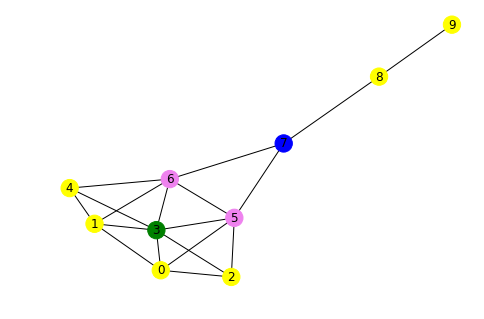

In [15]:
color_map = ['yellow', 'yellow', 'yellow', 'green', 'yellow', 'violet', 'violet', 'blue', 'yellow', 'yellow']
nx.draw(Knetwork, with_labels = True, node_color = color_map)
plt.show()